In [1]:
import statsmodels.api as sa
import scikit_posthocs as sp
import pandas as pd
import numpy as np

In [2]:
case='paired'
# case='unpaired'

raw_data=pd.read_excel('/data2/yixuan/SCMbench/CDgraph/'+case+'_inte.xlsx')
raw_data

,datasets,Glue,scMDC,scJoint,bindSC,Seurat4,Cobolt,Seurat5,scMoMaT,MoFA,LIGER,UnionCom,TotalVI,PCA,scVI,Deepmaps,MMD-MA,Pamona,scGPT,iNMF
0,10x-Multiome-Pbmc10k,0.676475,0.739050,0.764350,0.660300,0.795150,0.630875,0.552175,0.627600,0.534600,0.509000,0.452925,0.506325,0.480475,0.550625,0.567450,0.331375,0.471725,0.338800,0.203225
1,Chen-2019,0.628675,0.603350,0.443925,NaN,0.419700,0.546175,0.487975,0.561550,0.477400,0.406950,0.440775,0.354125,0.421775,0.321650,0.484250,0.350500,0.272200,0.241275,0.162375
2,Ma-2020-batch-53,0.644600,0.538950,0.579375,0.557900,0.526750,0.495775,0.516800,0.426250,0.482900,0.478775,0.471525,0.336625,0.375650,0.380375,0.272475,0.350225,0.305100,0.245150,0.176850
3,Ma-2020-batch-54,0.523825,0.474100,0.496800,0.474975,0.461425,0.496125,0.478125,0.407675,0.452100,0.431550,0.390450,0.526675,0.350075,0.342600,0.232325,0.361475,0.259625,0.206650,0.147450
4,Ma-2020-batch-55,0.523000,0.443675,0.506550,0.482600,0.467800,0.495475,0.486300,0.397625,0.450225,0.458225,0.403875,0.357400,0.315725,0.324425,0.216375,0.336825,0.272300,0.206300,0.137375


In [3]:
raw_data.columns[1:]

Index(['Glue', 'scMDC', 'scJoint', 'bindSC', 'Seurat4', 'Cobolt', 'Seurat5',
       'scMoMaT', 'MoFA', 'LIGER', 'UnionCom', 'TotalVI', 'PCA', 'scVI',
       'Deepmaps', 'MMD-MA', 'Pamona', 'scGPT', 'iNMF'],
      dtype='object')

In [4]:
dict_data={}
for i in raw_data.columns[1:]:
    dict_data[i]=raw_data[i].values

In [5]:

data = (
  pd.DataFrame(dict_data)
  .rename_axis('fold')
  .melt(
      var_name='datasets',
      value_name='score',
      ignore_index=False,
  )
  .reset_index()
)
data

,fold,datasets,score
0,0,Glue,0.676475
1,1,Glue,0.628675
2,2,Glue,0.644600
3,3,Glue,0.523825
4,4,Glue,0.523000
...,...,...,...
90,0,iNMF,0.203225
91,1,iNMF,0.162375
92,2,iNMF,0.176850
93,3,iNMF,0.147450


In [6]:
avg_rank = data.groupby('fold').score.rank(pct=True).groupby(data.datasets).mean()
avg_rank

datasets
Cobolt      0.798246
Deepmaps    0.365497
Glue        0.957895
LIGER       0.519883
MMD-MA      0.287135
MoFA        0.596491
PCA         0.352632
Pamona      0.212281
Seurat4     0.720468
Seurat5     0.745029
TotalVI     0.477193
UnionCom    0.447953
bindSC      0.802632
iNMF        0.053216
scGPT       0.116959
scJoint     0.869591
scMDC       0.788889
scMoMaT     0.598830
scVI        0.349708
Name: score, dtype: float64

In [7]:
import scipy.stats as ss
import matplotlib.pyplot as plt
ss.friedmanchisquare(*dict_data.values())

FriedmanchisquareResult(statistic=72.12631578947367, pvalue=1.967183953215567e-08)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7f556afcebd0>)

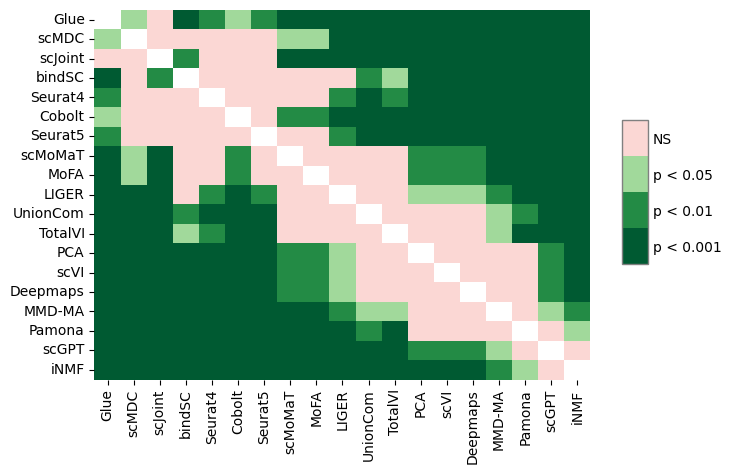

In [8]:
test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='fold',
    group_col='datasets',
    y_col='score',
)
sp.sign_plot(test_results)

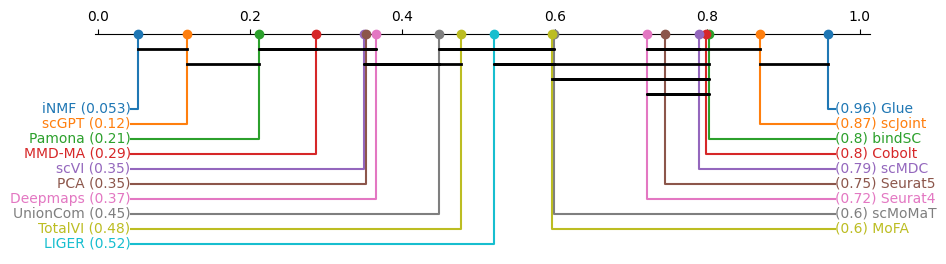

In [11]:
plt.figure(figsize=(10, 3), dpi=100)
# plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, test_results)
plt.savefig('/data2/yixuan/SCMbench/CDgraph/cdgraph_'+case+'.eps')